In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
paths={ 
       'Minus 0.15%':"./data/100points/minus/python_output_may20.csv",
       'Magic Momentum':"./data/100points/nominal2/python_output_may20.csv",
       'Plus 0.15%':"./data/100points/plus/python_output_may20.csv",
       #'E989 Momentum Dist.':"./data/100points/nominal/python_output_may12.csv"
      }

In [3]:
saveImages = False

In [4]:
%%time

dfs = {}

for name in paths:
    print(name, paths[name])
    dfi_full = pandas.read_csv(paths[name])
    dfi = dfi_full#.sample(1000)
    if("inus" in name):
        dfi = dfi.loc[dfi['initialCollimatorEnergy'] < 3093]
    elif("lus" in name):
        dfi = dfi.loc[dfi['initialCollimatorEnergy'] > 3098]
    dfi['theta'] = np.arctan2(dfi['collR']-7112, dfi['collY'])
    dfi = dfi.sort_values(by=['theta'])

    dfs[name] = dfi
    
    #break

Minus 0.15% ./data/100points/minus/python_output_may20.csv


/home/jlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


Magic Momentum ./data/100points/nominal2/python_output_may20.csv
Plus 0.15% ./data/100points/plus/python_output_may20.csv
CPU times: user 12.3 s, sys: 2.8 s, total: 15.1 s
Wall time: 28.6 s


/home/jlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [5]:
dfi.head()

,Unnamed: 0,filenum,name,collimator_set,in-out,top-bot,coll,calo,calo2,calo3,...,goodtriples,efficiency,drifttime,corner_num,ncaloentries,collimatorEnergyLoss,caloEnergyLoss,initialCollimatorEnergy,initialCaloEnergy,theta
0,0,0,simutree_muonsAndPositrons_col8_plus_49,8,NaN,NaN,8,4,5,6,...,1904,0.145244,54.237041,49,6,11.777344,168.112549,3100.791748,3000.464111,-3.109862
1495,1495,0,simutree_muonsAndPositrons_col8_plus_49,8,NaN,NaN,8,23,0,1,...,1904,0.145244,23.341007,49,8,3.127686,144.691650,3100.791748,2821.762451,-3.109862
1494,1494,0,simutree_muonsAndPositrons_col8_plus_49,8,NaN,NaN,8,1,2,3,...,1904,0.145244,35.771236,49,6,12.434814,153.699707,3100.791748,3002.665039,-3.109862
1493,1493,0,simutree_muonsAndPositrons_col8_plus_49,8,NaN,NaN,8,12,13,14,...,1904,0.145244,103.684679,49,6,12.650391,143.059814,3100.791748,2978.681885,-3.109862
1492,1492,0,simutree_muonsAndPositrons_col8_plus_49,8,NaN,NaN,8,21,22,23,...,1904,0.145244,159.996197,49,6,12.017334,163.870850,3100.791748,2866.733398,-3.109862


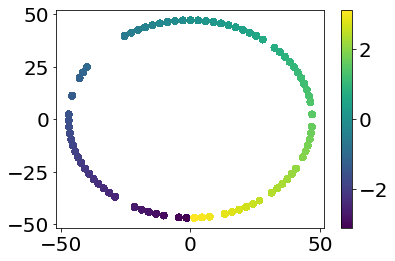

In [6]:
for name in dfs:
    df = dfs[name]
plt.scatter(df['collR']-7112, df['collY'], c=df['theta'])
plt.colorbar()
plt.show()

---

### Lets start by looking at the efficiency in each of the corner regions

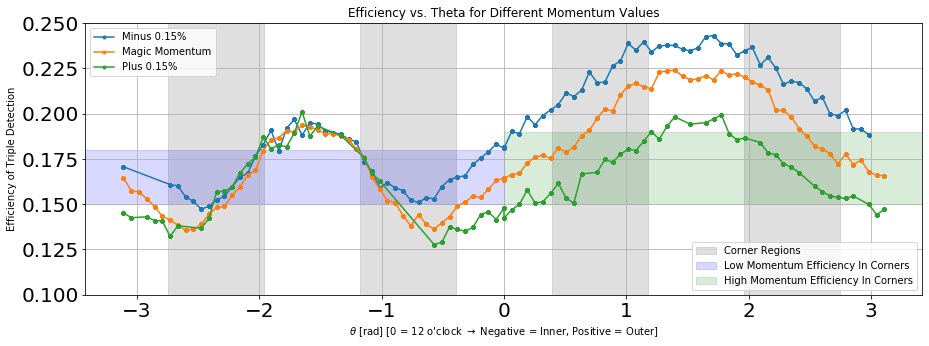

In [17]:
from matplotlib.patches import Rectangle

fig,ax = plt.subplots(figsize=(15,5))
for name in dfs:
    df = dfs[name]
    #if("E989" in name):
    #    continue
    plt.plot(df['theta'], df['efficiency'],".-",label=name)
plt.grid()
plt.title("Efficiency vs. Theta for Different Momentum Values")
plt.xlabel(r"$\theta$ [rad] [0 = 12 o'clock $\rightarrow$ Negative = Inner, Positive = Outer]")
plt.ylabel("Efficiency of Triple Detection")


rects = []
for i in range(4):
    center = -3*math.pi/4 + i*math.pi/2.
    width = math.pi/8.
    #plt.plot([center, center], [0.2, 0.40],":", color="black")
    rect = Rectangle((center-width,0),width*2,0.4,color='grey',alpha=0.25,label="Hi")
    rects.append(rect)
    
    ax.add_artist(rects[i])
plt.ylim(0.1,0.25)
rects[0].set_label("Corner Regions")

rect = Rectangle((-4,0.15),4,0.03,color='blue',alpha=0.15,label="Low Momentum Efficiency In Corners")
ax.add_artist(rect)

rect2 = Rectangle((0,0.15),4,0.04,color='green',alpha=0.15,label="High Momentum Efficiency In Corners")
ax.add_artist(rect2)

ding = plt.legend(loc=2)
dong = plt.legend(handles=[rects[0], rect, rect2], loc=4)
ax.add_artist(ding)

if(saveImages):
    plt.savefig("./images/Efficiency_vs_Theta.png",bbox_inches='tight')
    plt.savefig("./images/Efficiency_vs_Theta.pdf",bbox_inches='tight')


plt.show()

In [9]:
corner_regions = {}
width = math.pi/8.
for i, name in enumerate(dfs):
    df = dfs[name]
    if("%" in name):
        print(name)
        if("inus" in name):
            corner_regions[name] = [ [-3*math.pi/4., -1*math.pi/4.], width ]
        elif("lus" in name):
            corner_regions[name] = [ [ 1*math.pi/4.,  3*math.pi/4.], width ]

Minus 0.15%
Plus 0.15%


Minus 0.15% -2.356194490192345 0.39269908169872414
Minus 0.15% -0.7853981633974483 0.39269908169872414
Plus 0.15% 0.7853981633974483 0.39269908169872414
Plus 0.15% 2.356194490192345 0.39269908169872414


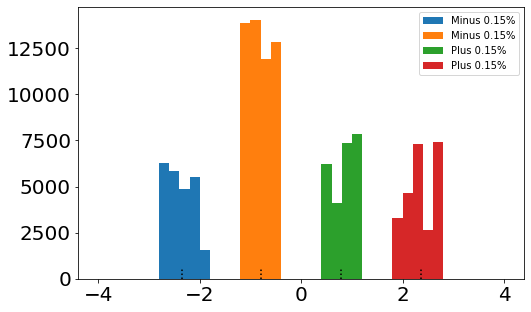

In [10]:
fig, ax = plt.subplots(figsize=(8,5))
for i, name in enumerate(dfs):
    try:
        width = corner_regions[name][1]
    except:
        continue
    for corner in corner_regions[name][0]:
        print(name, corner, width)
        df = dfs[name].loc[dfs[name]['theta'] >= corner-width].loc[dfs[name]['theta'] <= corner+width]
        #df = dfs[name].loc[dfs[name]['theta'] < corner+width]
        plt.hist(df['theta'],label=name,range=(-4,4), bins=40)
plt.legend()


for i in range(4):
    plt.plot([-3*math.pi/4 + i*math.pi/2., -3*math.pi/4 + i*math.pi/2], [0.2, 600],":", color="black")
#plt.ylim(0.2,0.4)

plt.show()

-2.356194490192345 0.39269908169872414 Minus 0.15% 0.15880436465384823 0.009907883430078606
-0.7853981633974483 0.39269908169872414 Minus 0.15% 0.16020175909114048 0.0067488194797458755
0.7853981633974483 0.39269908169872414 Plus 0.15% 0.1710927627140711 0.009946741585859536
2.356194490192345 0.39269908169872414 Plus 0.15% 0.1702091107461853 0.011611797232880075


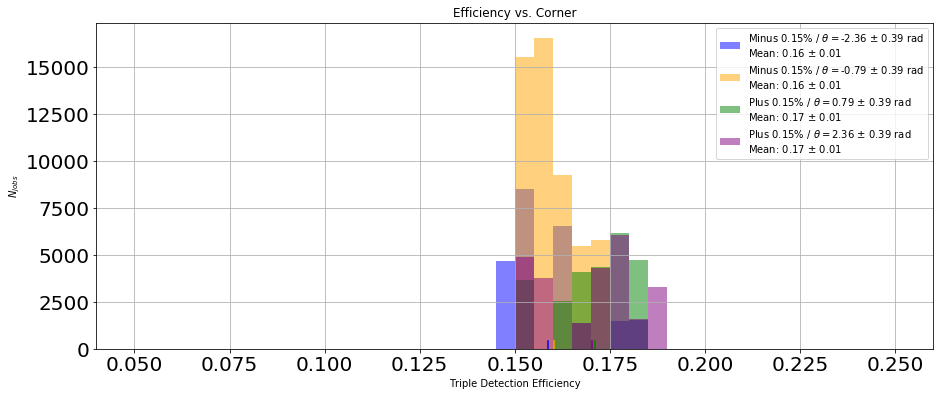

In [12]:
fig, ax = plt.subplots(figsize=(15,6))
colors=['blue', 'orange', 'green', 'purple']
counter = 0
for i, name in enumerate(dfs):
    try:
        width = corner_regions[name][1]
    except:
        continue
    for corner in corner_regions[name][0]:
        #print(name, corner, width)
        df = dfs[name].loc[dfs[name]['theta'] >= corner-width].loc[dfs[name]['theta'] <= corner+width]
        #df = dfs[name].loc[dfs[name]['theta'] < corner+width]
        plt.hist(df['efficiency'],
                 label=(name+r" / $\theta=$"+str(round(corner,2))+r" $\pm$ "+str(round(width,2))+" rad\n"+
                             "Mean: "+str(round(np.mean(df['efficiency']),2))
                             +r" $\pm$ "+str(round(np.std(df['efficiency']),2))),
                 range=(0.05,0.25), bins=40,
                 alpha=0.5,
                 color=colors[counter]
                )
        plt.plot([np.mean(df['efficiency']),np.mean(df['efficiency'])], [0,400], 
                 #label="Mean: "+str(round(np.mean(df['efficiency']),2)),
                 color = colors[counter])
        counter += 1
        
        print(corner, width, name, np.mean(df['efficiency']), np.std(df['efficiency']) )
        
plt.legend(ncol=1)
plt.title("Efficiency vs. Corner")
plt.xlabel("Triple Detection Efficiency")
plt.ylabel(r"$N_{jobs}$")
plt.grid()


if(saveImages):
    plt.savefig("./images/Efficiency_vs_Corner.png",bbox_inches='tight')
    plt.savefig("./images/Efficiency_vs_Corner.pdf",bbox_inches='tight')

plt.show()

---

### 2-D efficiency maps

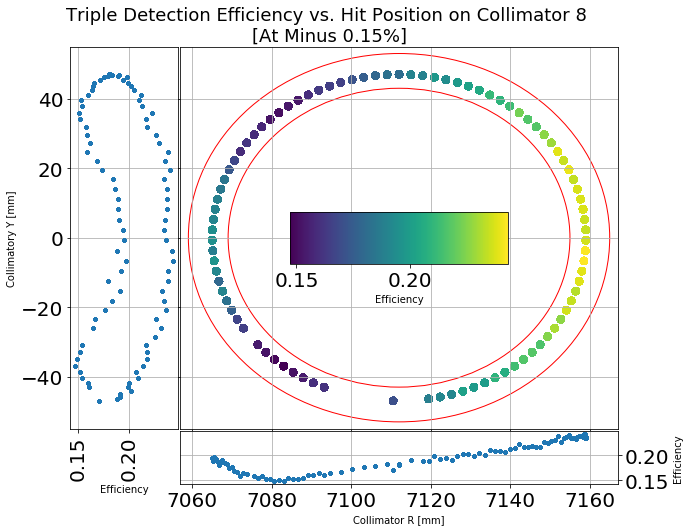

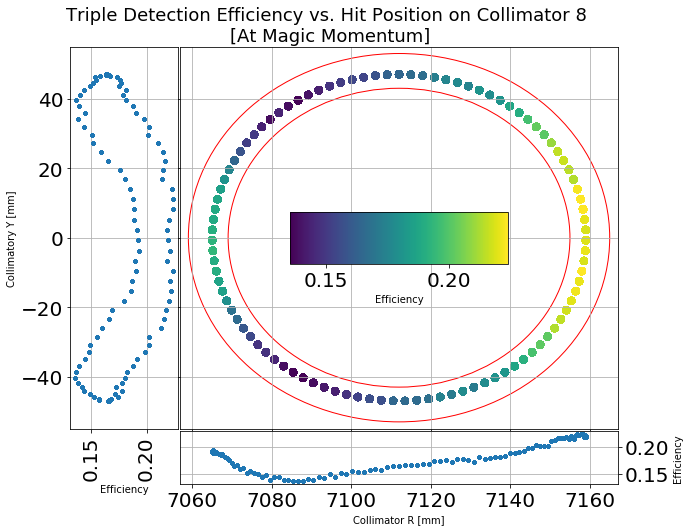

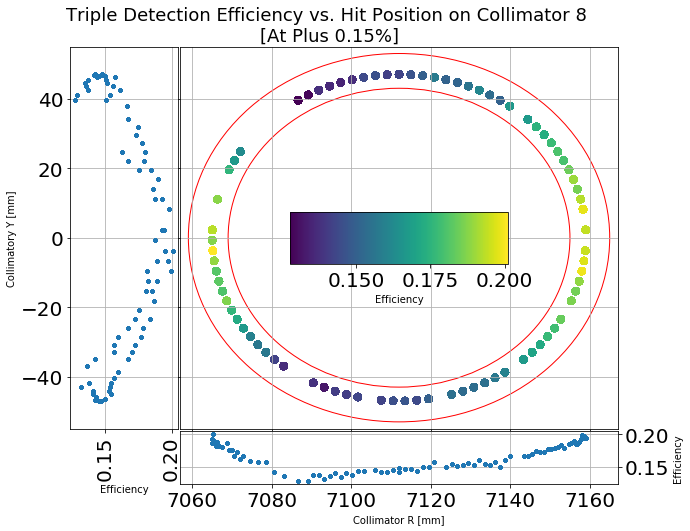

In [13]:
for name in dfs:
    df = dfs[name]

    fig = plt.figure(constrained_layout=False, figsize=(8,8))
    gs1 = fig.add_gridspec(nrows=10, ncols=10,
                            left=0.05, right=1,
                            bottom=0.05, top=1,
                            wspace=0.05, hspace=0.05 #bottom= 0.05, top=0.06
                          )
    ax1 = fig.add_subplot(gs1[:-3, 2:])

    plt.suptitle("Triple Detection Efficiency vs. Hit Position on Collimator 8 \n[At "+name+"]", y=1.07, fontsize=18)

    #circle = plt.Circle((7112, 0), 48, color='xkcd:dark orange', fill=False)
    #ax.add_artist(circle)
    circle2 = plt.Circle((7112, 0), 43, color='r', fill=False)
    ax1.add_artist(circle2)
    circle3 = plt.Circle((7112, 0), 53, color='r', fill=False)
    ax1.add_artist(circle3)

    scatter = ax1.scatter(df['collR'], df['collY'], c=df['efficiency'], s=50,
                         #vmin=0.25, vmax=0.45
                         )
    #plt.colorbar(scatter)
    ax1.grid()

    ax1.set_xlim(7112-55, 7112+55)
    ax1.set_ylim(-55,55)
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])


    ax2 = fig.add_subplot(gs1[-3, 2:])
    ax2.plot(df['collR'], df['efficiency'],".")
    ax2.set_xlim(7112-55, 7112+55)
    ax2.set_ylabel("Efficiency")
    ax2.set_xlabel("Collimator R [mm]")
    ax2.grid()
    ax2.yaxis.set_label_position("right") 
    ax2.yaxis.tick_right()


    ax3 = fig.add_subplot(gs1[:-3,:2])
    ax3.plot(df['efficiency'], df['collY'],".")
    ax3.set_ylim(-55,55)
    ax3.set_xlabel("Efficiency")
    ax3.grid()
    ax3.set_ylabel("Collimatory Y [mm]")
    plt.sca(ax3)
    plt.xticks(rotation=90)
    #plt.tight_layout()


    ax4 = fig.add_subplot(gs1[3:4,4:8])
    cbar = fig.colorbar(scatter, cax=ax4, orientation='horizontal')
    cbar.set_label('Efficiency', rotation=0)
    
    
    if(saveImages):
        plt.savefig("./images/Efficiency_vs_Position_"+str(name)+".png",bbox_inches='tight')
        plt.savefig("./images/Efficiency_vs_Position_"+str(name)+".pdf",bbox_inches='tight')

    plt.show()

---

### Where did the triples hit for the various momenta

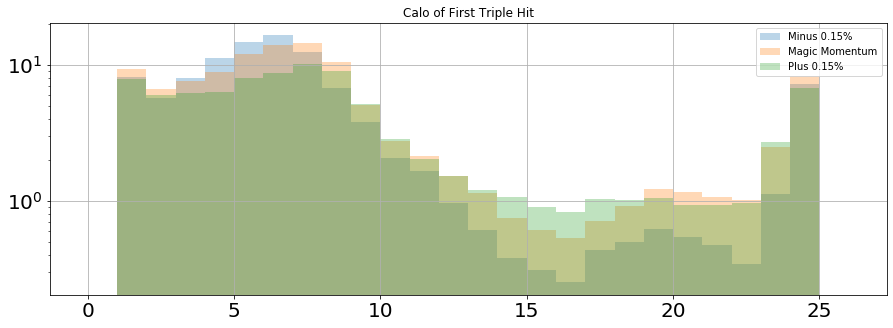

In [18]:
fig, ax = plt.subplots(figsize=(15,5))
for name in dfs:
    df = dfs[name]
    for coll in [8]:
        dfi = df.loc[df['coll'] == coll]
        if coll == 6:
            offset = 4
        else:
            offset = 0
        plt.hist(((dfi['calo']+1+offset)%24)+1, range=(0,26), bins=26 ,
                 label=name, alpha=0.3, weights=1./dfi['goodtriples'])
plt.legend()
plt.title("Calo of First Triple Hit")
plt.yscale("log")
plt.grid()
plt.show()

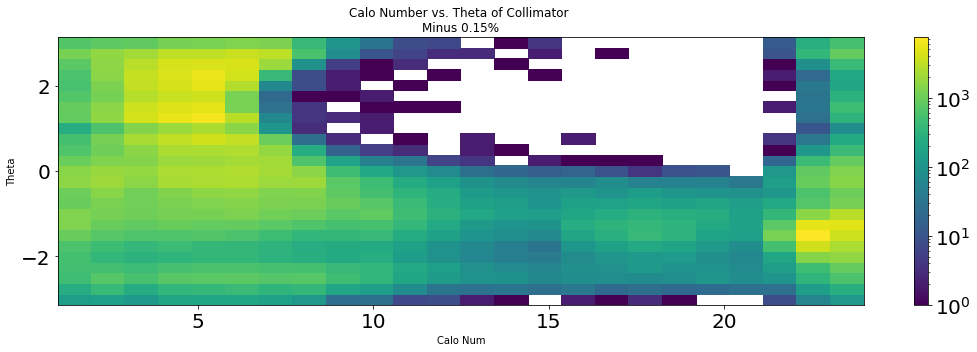

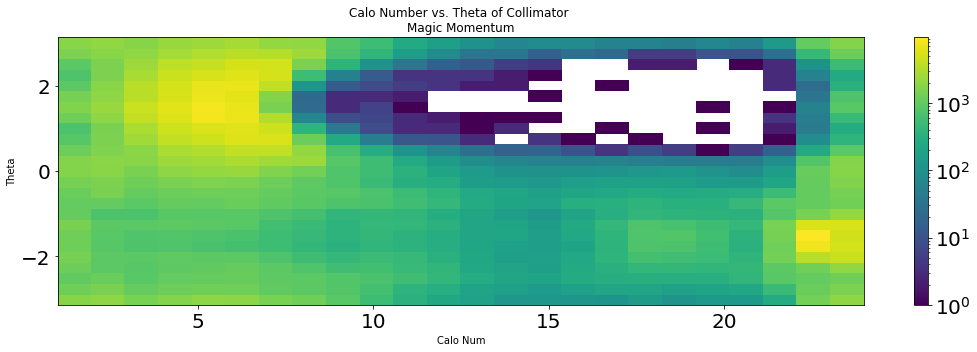

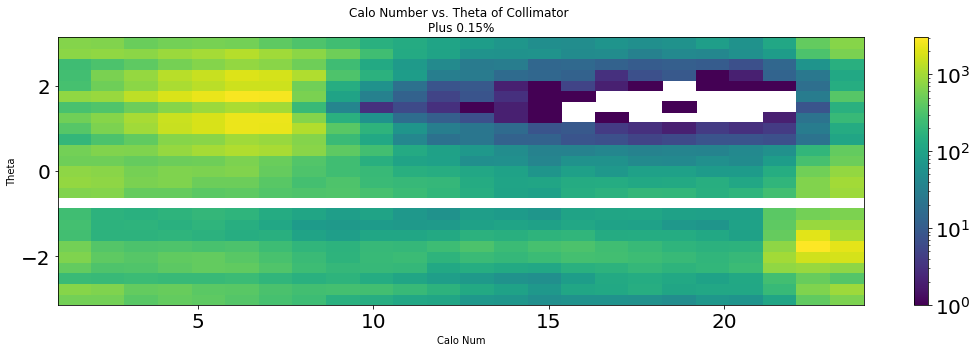

In [19]:
for name in dfs:
    df = dfs[name]
    fig,ax = plt.subplots(figsize=(15,5))
    
    plt.hist2d(df['calo']+1, df['theta'], bins=(24,25), range=((1,24), (-math.pi, math.pi)),
              norm=matplotlib.colors.LogNorm())
    plt.title("Calo Number vs. Theta of Collimator \n"+name)
    plt.ylabel("Theta")
    plt.xlabel("Calo Num")
    
    plt.colorbar()
    plt.tight_layout()
    
    if(saveImages):
        plt.savefig("./images/CaloNum_vs_Theta_"+str(name)+".png",bbox_inches='tight')
        plt.savefig("./images/CaloNum_vs_Theta_"+str(name)+".pdf",bbox_inches='tight')
    
    plt.show()

---

### Drift time 

/home/jlab/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


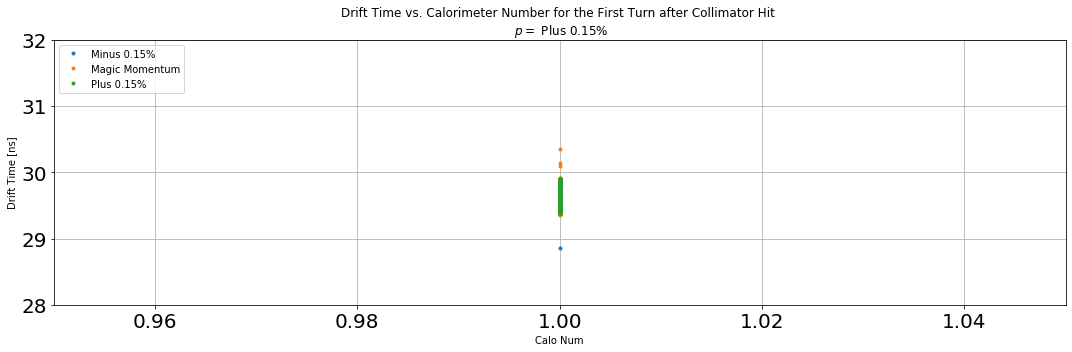

In [20]:
fig,ax = plt.subplots(figsize=(15,5))

for name in dfs:
    df = dfs[name]
    
    #plt.hist2d(df['calo']+1, df['drifttime'], bins=(26,100), range=((0,26), (0,150)), 
    #           norm=matplotlib.colors.LogNorm())
    plt.plot(df['calo']+1, df['drifttime'], ".",label=name)
    plt.title("Drift Time vs. Calorimeter Number for the First Turn after Collimator Hit \n"+r" $p =$ "+name)
    plt.ylabel("Drift Time [ns]")
    plt.xlabel("Calo Num")
    
#plt.ylim(0,150)
plt.ylim(28,32)
plt.xlim(0.95,1.05)
plt.grid()
#plt.colorbar()
plt.tight_layout()
plt.legend()
plt.show()

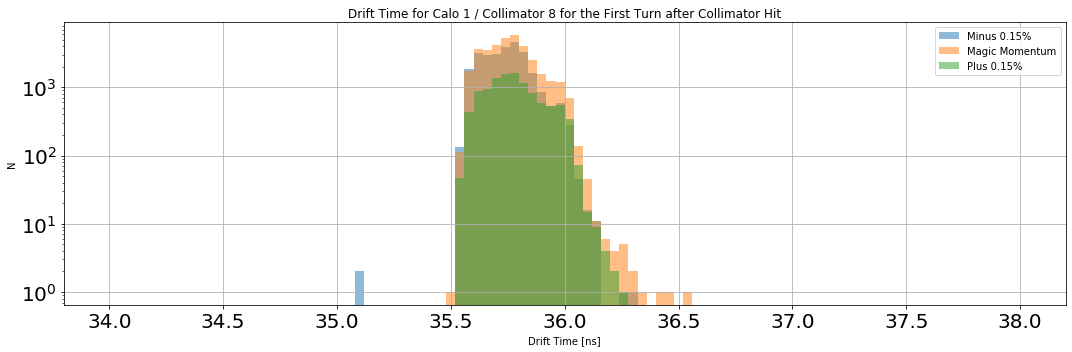

In [21]:
fig,ax = plt.subplots(figsize=(15,5))

for name in dfs:
    df = dfs[name].loc[dfs[name]['calo'] == 1]
    
    #plt.hist2d(df['calo']+1, df['drifttime'], bins=(26,100), range=((0,26), (0,150)), 
    #           norm=matplotlib.colors.LogNorm())
    plt.hist(df['drifttime'], bins=100, range=(34,38),label=name,alpha=0.5)
    plt.title("Drift Time for Calo 1 / Collimator 8 for the First Turn after Collimator Hit")
    plt.xlabel("Drift Time [ns]")
    plt.ylabel("N")
    
plt.grid()
#plt.colorbar()
plt.yscale("log")
plt.tight_layout()
plt.legend()
plt.show()

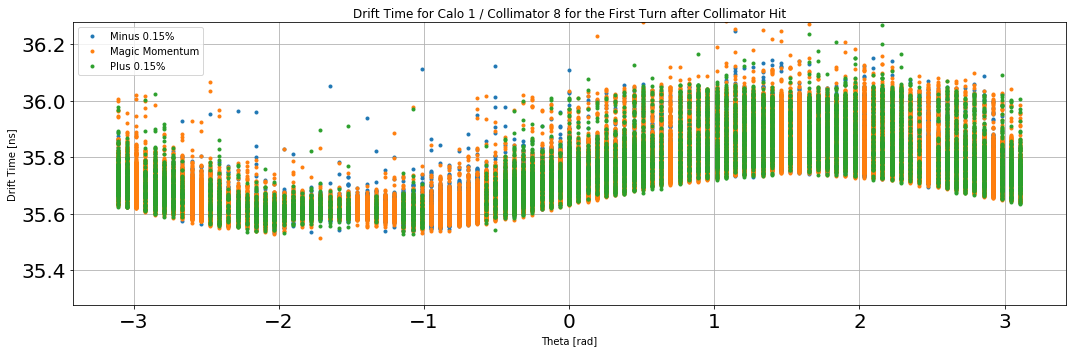

In [22]:
fig,ax = plt.subplots(figsize=(15,5))

calo = 1
for name in dfs:
    df = dfs[name].loc[dfs[name]['calo'] == calo].loc[dfs[name]['drifttime'] < 150]
    
    #plt.hist2d(df['calo']+1, df['drifttime'], bins=(26,100), range=((0,26), (0,150)), 
    #           norm=matplotlib.colors.LogNorm())y
    plt.plot(df['theta'], df['drifttime'], ".", label=name)

plt.title("Drift Time for Calo "+str(calo)+" / Collimator 8 for the First Turn after Collimator Hit")
plt.ylabel("Drift Time [ns]")
plt.xlabel("Theta [rad]")   
plt.grid()
#plt.colorbar()
#plt.yscale("log")
plt.ylim(np.mean(df['drifttime'])-.5, np.mean(df['drifttime'])+.5 )
plt.tight_layout()
plt.legend()
plt.show()

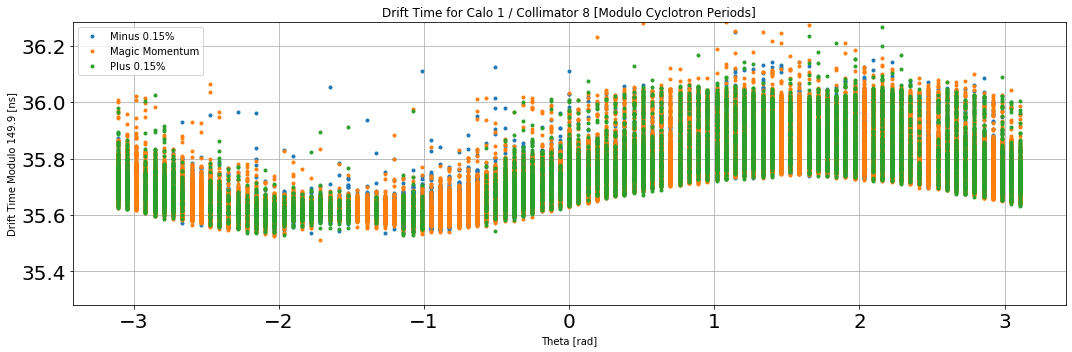

In [23]:
fig,ax = plt.subplots(figsize=(15,5))

calo = 1
cyclotronperiod  = 149.9 #ns
for name in dfs:
    df = dfs[name].loc[dfs[name]['calo'] == calo]
    
    #plt.hist2d(df['calo']+1, df['drifttime'], bins=(26,100), range=((0,26), (0,150)), 
    #           norm=matplotlib.colors.LogNorm())y
    plt.plot(df['theta'], df['drifttime']%cyclotronperiod, ".", label=name)

plt.title("Drift Time for Calo "+str(calo)+" / Collimator 8 [Modulo Cyclotron Periods]")
plt.ylabel("Drift Time Modulo 149.9 [ns]")
plt.xlabel("Theta [rad]")   
plt.grid()
#plt.colorbar()
#plt.yscale("log")
plt.ylim(np.mean(df['drifttime'] % cyclotronperiod)-.35, np.mean(df['drifttime'] % cyclotronperiod)+.65 )
plt.tight_layout()
plt.legend()
plt.show()

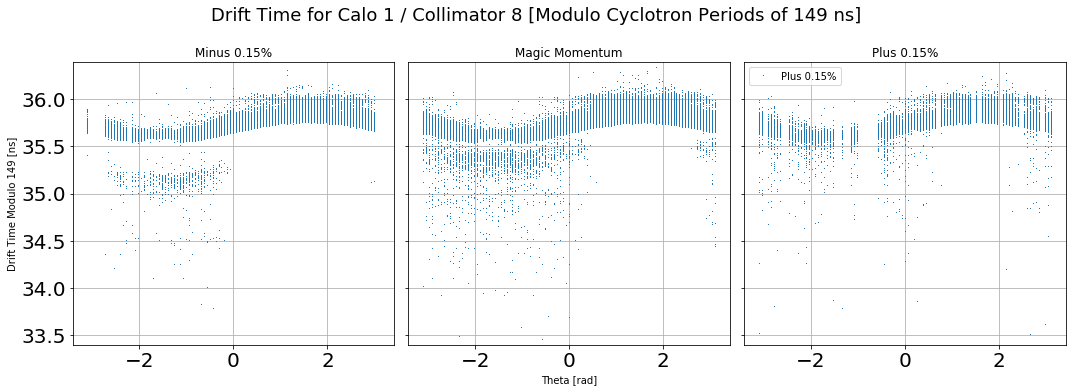

In [24]:
fig,ax = plt.subplots(1,3,figsize=(15,5), sharex=True, sharey=True)

calo = 1
cyclotronperiod  = 149 #ns
for i, name in enumerate(dfs):
    df = dfs[name].loc[dfs[name]['calo'] == calo]
    
    #plt.hist2d(df['calo']+1, df['drifttime'], bins=(26,100), range=((0,26), (0,150)), 
    #           norm=matplotlib.colors.LogNorm())y
    ax[i].plot(df['theta'], df['drifttime']%cyclotronperiod, ",", label=name)
    ax[i].set_ylim(np.mean(df['drifttime'] % cyclotronperiod)-2.35, np.mean(df['drifttime'] % cyclotronperiod)+.65 )
    ax[i].grid()
    if(i < 1):
        ax[i].set_ylabel("Drift Time Modulo "+str(cyclotronperiod)+" [ns]")
    if(1 == i):
        ax[i].set_xlabel("Theta [rad]") 
    ax[i].set_title(name)


plt.suptitle("Drift Time for Calo "+str(calo)+" / Collimator 8 [Modulo Cyclotron Periods of "+str(cyclotronperiod)+" ns]", 
             y=1.08, fontsize=18)
  
#plt.colorbar()
#plt.yscale("log")
plt.tight_layout()
plt.legend()
plt.show()

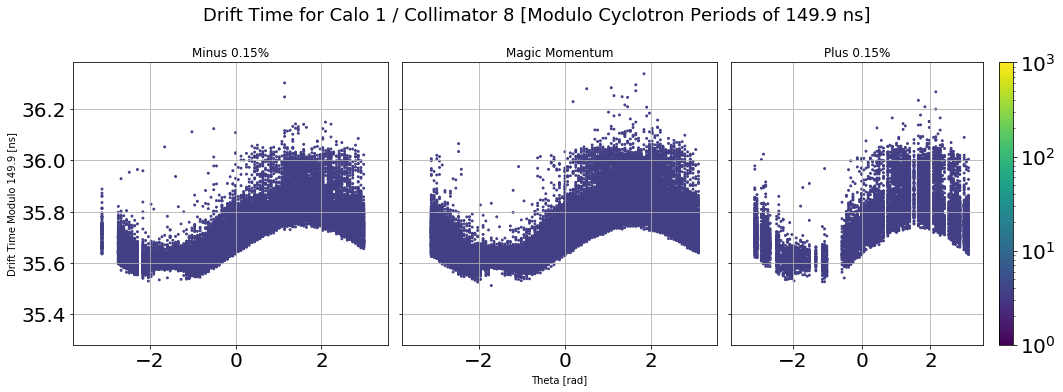

In [25]:
fig,ax = plt.subplots(1,3,figsize=(15,5), sharex=True, sharey=True)

calo = 1
cyclotronperiod  = 149.9 #ns
for i, name in enumerate(dfs):
    df = dfs[name].loc[dfs[name]['calo'] == calo]
    
    #plt.hist2d(df['calo']+1, df['drifttime'], bins=(26,100), range=((0,26), (0,150)), 
    #           norm=matplotlib.colors.LogNorm())y
    scatter = ax[i].scatter(df['theta'], df['drifttime'], label=name,
                            c=df['drifttime']/10.,
                            norm=matplotlib.colors.LogNorm(vmin=1,vmax=1000),
                            s=df['drifttime']/10.
                           )
    ax[i].set_ylim(np.mean(df['drifttime'] % cyclotronperiod)-.35, np.mean(df['drifttime'] % cyclotronperiod)+.75 )
    ax[i].grid()
    if(i < 1):
        ax[i].set_ylabel("Drift Time Modulo "+str(cyclotronperiod)+" [ns]")
    if(1 == i):
        ax[i].set_xlabel("Theta [rad]") 
    ax[i].set_title(name)

    
plt.colorbar(mappable=scatter)

plt.suptitle("Drift Time for Calo "+str(calo)+" / Collimator 8 [Modulo Cyclotron Periods of "+str(cyclotronperiod)+" ns]", 
             y=1.08, fontsize=18)

#plt.xscale("log")
plt.tight_layout()
plt.show()

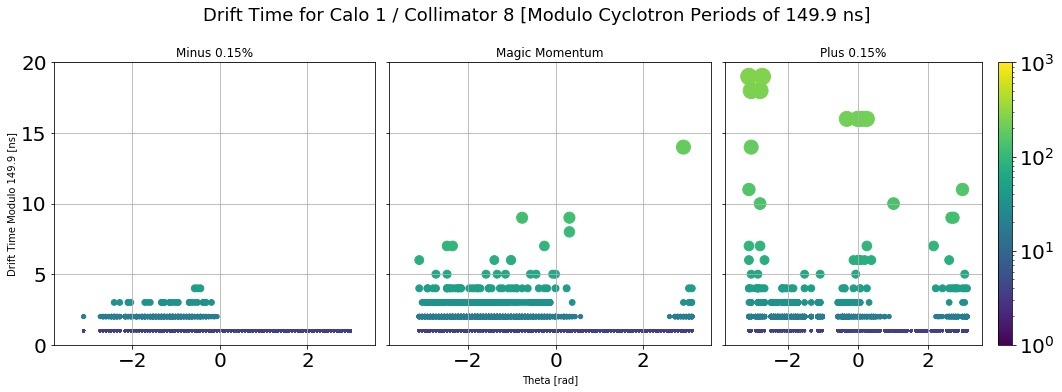

In [26]:
fig,ax = plt.subplots(1,3,figsize=(15,5), sharex=True, sharey=True)

calo = 1
cyclotronperiod  = 149.9 #ns
for i, name in enumerate(dfs):
    df = dfs[name].loc[dfs[name]['calo'] == calo]
    
    #plt.hist2d(df['calo']+1, df['drifttime'], bins=(26,100), range=((0,26), (0,150)), 
    #           norm=matplotlib.colors.LogNorm())y
    scatter = ax[i].scatter(df['theta'], np.ceil(df['drifttime']/cyclotronperiod), label=name,
                            c=df['drifttime']/10.,
                            norm=matplotlib.colors.LogNorm(vmin=1,vmax=1000),
                            s=df['drifttime']/10.
                           )
    #ax[i].set_ylim(np.mean(df['drifttime'] % cyclotronperiod)-.75, np.mean(df['drifttime'] % cyclotronperiod)+.75 )
    ax[i].grid()
    if(i < 1):
        ax[i].set_ylabel("Drift Time Modulo "+str(cyclotronperiod)+" [ns]")
    if(1 == i):
        ax[i].set_xlabel("Theta [rad]") 
    ax[i].set_title(name)

    
plt.colorbar(mappable=scatter)

plt.suptitle("Drift Time for Calo "+str(calo)+" / Collimator 8 [Modulo Cyclotron Periods of "+str(cyclotronperiod)+" ns]", 
             y=1.08, fontsize=18)
plt.ylim(0,20)

#plt.xscale("log")
plt.tight_layout()
plt.show()

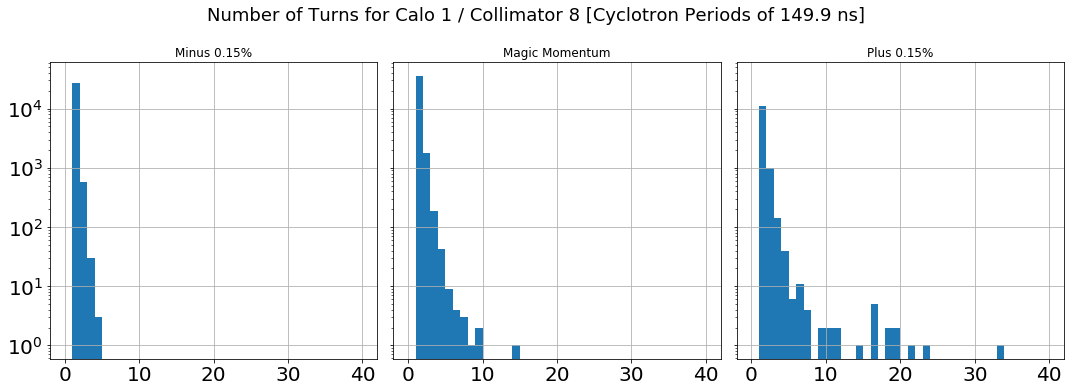

In [27]:
fig,ax = plt.subplots(1,3,figsize=(15,5), sharex=True, sharey=True)

calo = 1
cyclotronperiod  = 149.9 #ns
for i, name in enumerate(dfs):
    df = dfs[name].loc[dfs[name]['calo'] == calo]
    
    #plt.hist2d(df['calo']+1, df['drifttime'], bins=(26,100), range=((0,26), (0,150)), 
    #           norm=matplotlib.colors.LogNorm())y
    ax[i].hist(np.ceil(df['drifttime']/cyclotronperiod), bins=40, range=(0,40))
    #ax[i].set_ylim(np.mean(df['drifttime'] % cyclotronperiod)-.75, np.mean(df['drifttime'] % cyclotronperiod)+.75 )
    ax[i].grid()
    ax[i].set_title(name)

    
plt.suptitle("Number of Turns for Calo "+str(calo)+" / Collimator 8 [Cyclotron Periods of "+str(cyclotronperiod)+" ns]", 
             y=1.08, fontsize=18)
#plt.ylim(0,20)

plt.yscale("log")
plt.tight_layout()
plt.show()

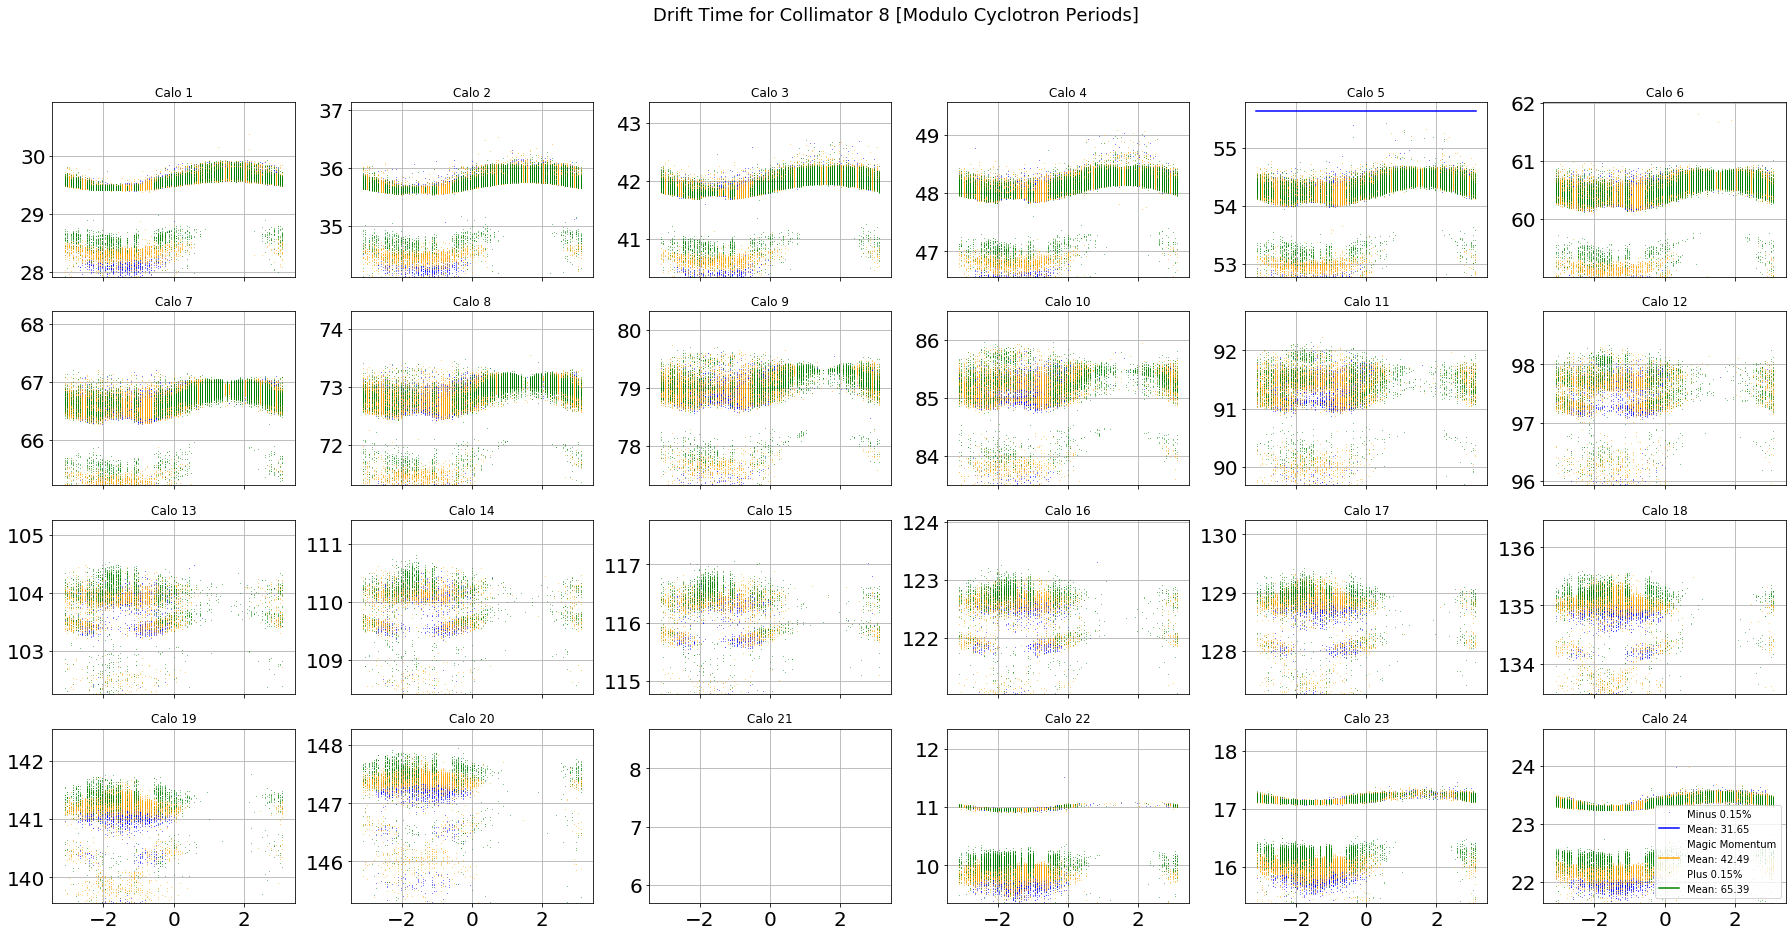

In [28]:
fig,axs = plt.subplots(4,6,figsize=(25,12), sharex=True)
ax = flatten2dArray(axs)
cyclotronperiod  = 149.9 #ns

colors = ['blue', 'orange', 'green']

for calo in range(1,25):
    #calo = 1
    axi = ax[calo-1]
    for i, name in enumerate(dfs):
        if("E9" in name):
            continue
        df = dfs[name].loc[dfs[name]['calo'] == calo-1]

        #plt.hist2d(df['calo']+1, df['drifttime'], bins=(26,100), range=((0,26), (0,150)), 
        #           norm=matplotlib.colors.LogNorm())y
        axi.plot(df['theta'], df['drifttime']%cyclotronperiod, ",", label=name,alpha=0.5,
                color=colors[i])
        axi.plot([-math.pi, math.pi], [np.mean(df['drifttime']),np.mean(df['drifttime'])],
                 label="Mean: "+str(round(np.mean(df['drifttime']),2)), color=colors[i])

    #axi.set_ylabel("Drift Time Modulo 149.9 [ns]")
    #axi.set_xlabel("Theta [rad]")   
    axi.set_title("Calo "+str(calo))
    axi.grid()
    #plt.colorbar()
    #plt.yscale("log")
    axi.set_ylim(np.mean(df['drifttime'] % cyclotronperiod)-1.5, np.mean(df['drifttime'] % cyclotronperiod)+1.5 )

plt.suptitle("Drift Time for Collimator 8 [Modulo Cyclotron Periods]", y=1.08, fontsize=18)
plt.tight_layout()
plt.legend()

if(saveImages):
    plt.savefig("/home/jlab/Desktop/DriftTime_vs_Calo_vs_Theta_vs_Momentum_Modulo.png")
    plt.savefig("/home/jlab/Desktop/DriftTime_vs_Calo_vs_Theta_vs_Momentum_Modulo.pdf")

plt.show()

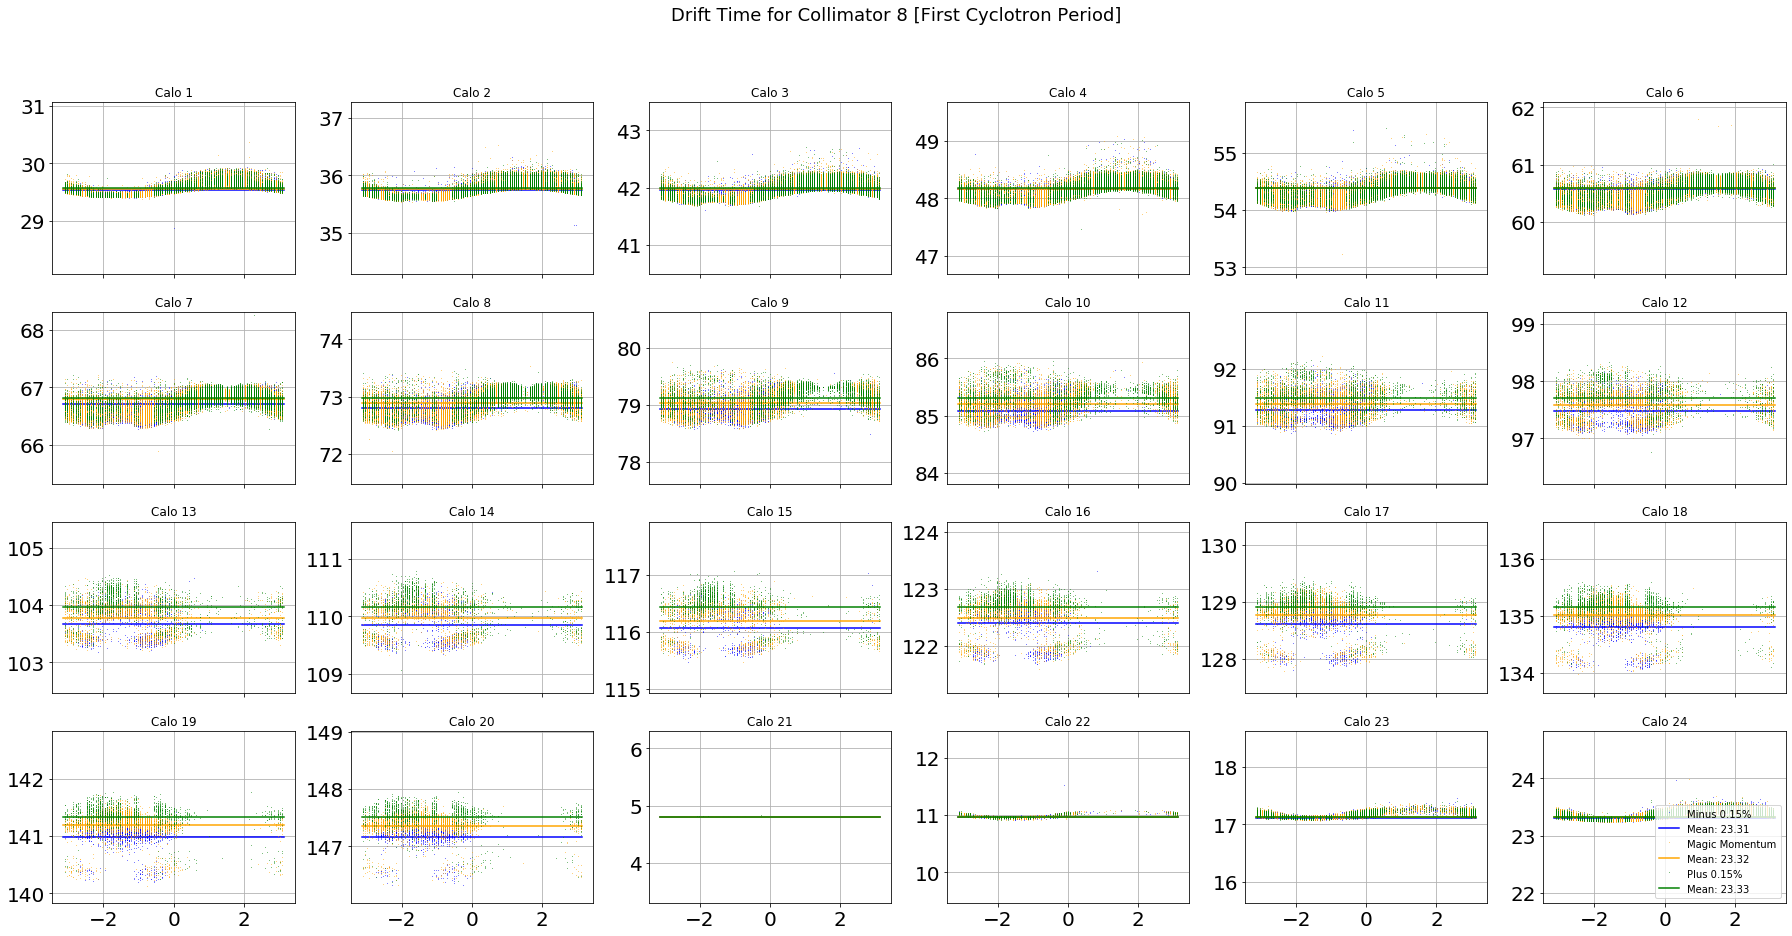

In [29]:
fig,axs = plt.subplots(4,6,figsize=(25,12), sharex=True)
ax = flatten2dArray(axs)
cyclotronperiod  = 149.9 #ns

colors = ['blue', 'orange', 'green']

for calo in range(1,25):
    #calo = 1
    axi = ax[calo-1]
    for i, name in enumerate(dfs):
        if("E9" in name):
            continue
        df = dfs[name].loc[dfs[name]['calo'] == calo-1].loc[dfs[name]['drifttime'] < 150]

        #plt.hist2d(df['calo']+1, df['drifttime'], bins=(26,100), range=((0,26), (0,150)), 
        #           norm=matplotlib.colors.LogNorm())y
        axi.plot(df['theta'], df['drifttime']%cyclotronperiod, ",", label=name,alpha=0.5,
                color=colors[i])
        axi.plot([-math.pi, math.pi], [np.mean(df['drifttime']),np.mean(df['drifttime'])],
                 label="Mean: "+str(round(np.mean(df['drifttime']),2)), color=colors[i])

    #axi.set_ylabel("Drift Time Modulo 149.9 [ns]")
    #axi.set_xlabel("Theta [rad]")   
    axi.set_title("Calo "+str(calo))
    axi.grid()
    #plt.colorbar()
    #plt.yscale("log")
    axi.set_ylim(np.mean(df['drifttime'] % cyclotronperiod)-1.5, np.mean(df['drifttime'] % cyclotronperiod)+1.5 )

plt.suptitle("Drift Time for Collimator 8 [First Cyclotron Period]", y=1.08, fontsize=18)
plt.tight_layout()
plt.legend()

if(saveImages):
    plt.savefig("/home/jlab/Desktop/DriftTime_vs_Calo_vs_Theta_vs_Momentum_NoLimit.png")
    plt.savefig("/home/jlab/Desktop/DriftTime_vs_Calo_vs_Theta_vs_Momentum_NoLimit.pdf")

plt.show()

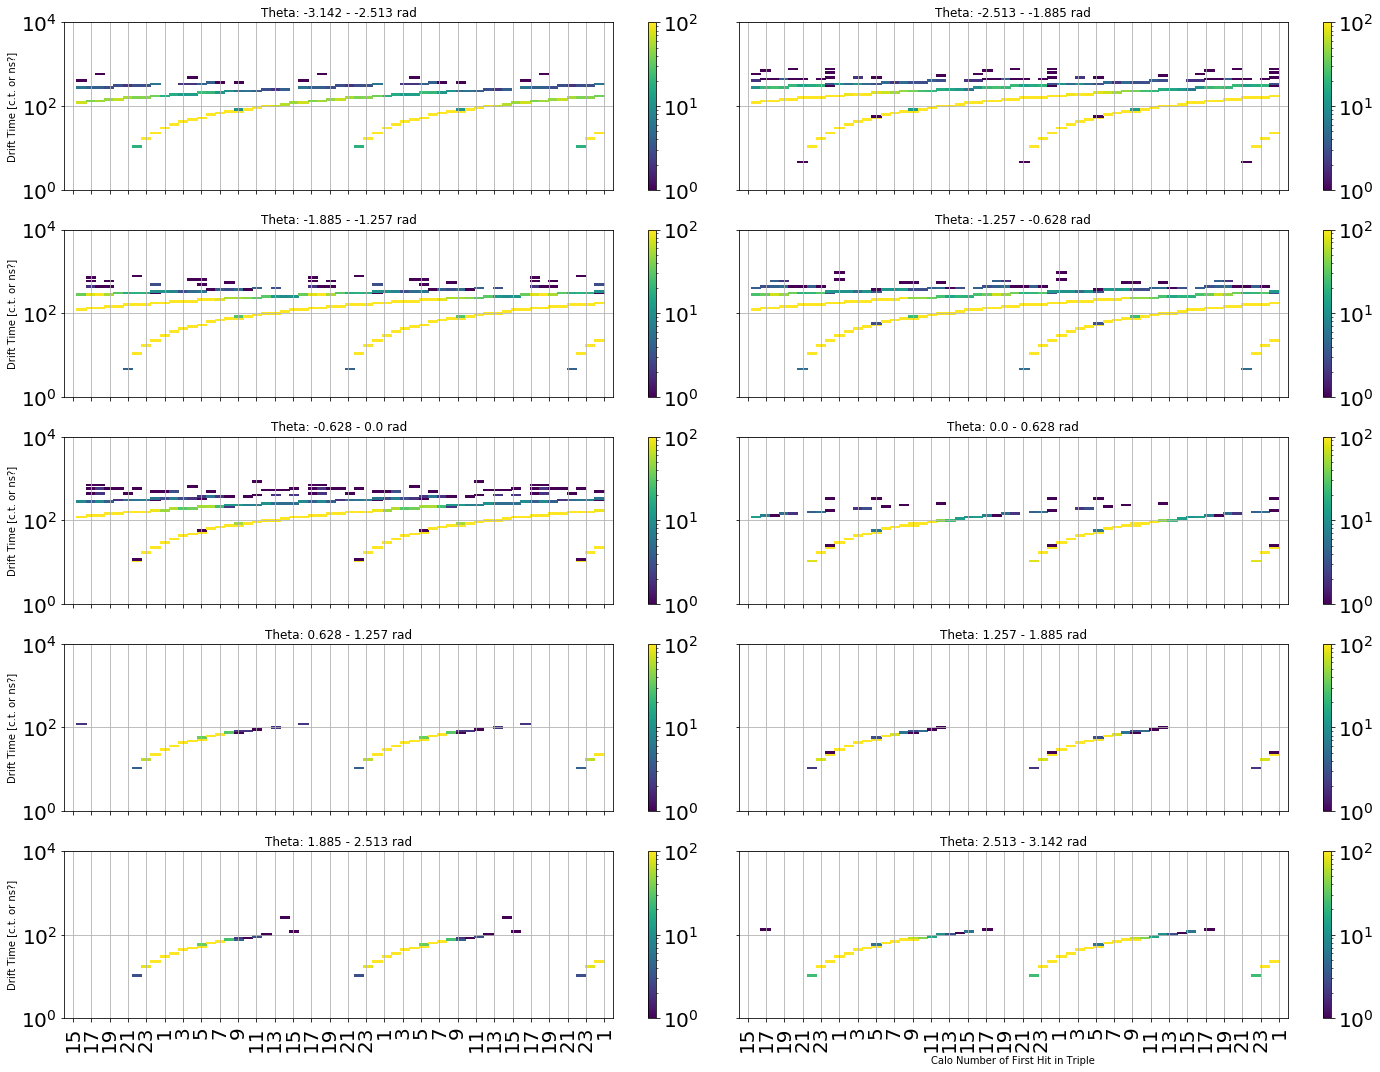

In [30]:
nplots = 11
thetas = np.linspace(-math.pi, math.pi, nplots)

fig,axs = plt.subplots(int(nplots/2), 2,figsize=(20,15),sharex=True,sharey=True)
ax = flatten2dArray(axs)

binarray = [
    np.linspace(-50,50,100),
    np.logspace(0,4,100)
]

for i, theta in enumerate(thetas):
    if(i == len(thetas)-1):
        break
    axi = ax[i]
    for name in dfs:
        df = dfs[name].loc[dfs[name]['theta'] >= theta].loc[dfs[name]['theta'] < thetas[i+1]]
        break

    if(True):
        splitcalo = 15
        dfi = df.loc[df['calo'] >= splitcalo]
        #axi.scatter(dfi['calo']+1-24, dfi['drifttime'], c=dfi['theta'])
        #axi.scatter(df['calo']+1+24, df['drifttime'], c=df['theta'])
        
        axi.hist2d((dfi['calo']+1-24), dfi['drifttime'], bins=binarray, 
               norm=matplotlib.colors.LogNorm(vmin=1, vmax=100)
              )
        
        axi.hist2d((df['calo']+1+24), df['drifttime'], bins=binarray, 
               norm=matplotlib.colors.LogNorm(vmin=1, vmax=100)
              )

    hist=axi.hist2d((df['calo']+1), df['drifttime'], bins=binarray, 
               norm=matplotlib.colors.LogNorm(vmin=1, vmax=100)
              )
    #scatter = plt.scatter((df['calo']+1), df['drifttime'],c=df['theta'])
    plt.colorbar(mappable=hist[3],ax=axi)
    
    axi.set_title("Theta: "+str(round(theta,3))+" - "+str(round(thetas[i+1],3))+" rad")
    if(i %2 == 0):
        axi.set_ylabel("Drift Time [c.t. or ns?]")
    if(i > nplots-3):
        axi.set_xlabel("Calo Number of First Hit in Triple")

    '''legend1 = ax.legend(*scatter.legend_elements(),
                        #loc="lower left", 
                        title="Collimator", 
                        ncol=2)
    ax.add_artist(legend1)'''

    '''handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
    legend2 = ax.legend(handles, labels, title="Efficiency", loc=4)'''

    plt.sca(axi)
    plt.xticks([x for x in range(splitcalo-24, 500,2)], labels=[x%24 for x in range(splitcalo-24, 500,2)],
                      rotation=90)
    #break
for axi in ax:
    axi.grid()
    axi.set_yscale("log")
plt.xlim(-10,50)
plt.tight_layout()
plt.show()

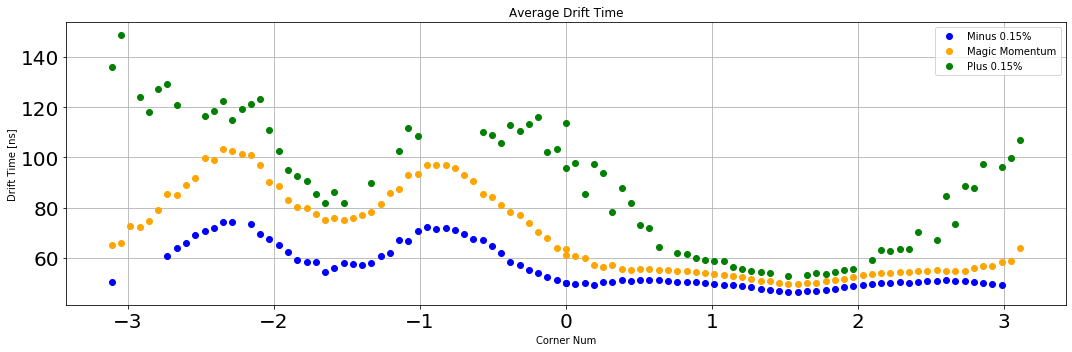

In [31]:
fig,ax = plt.subplots(figsize=(15,5))
colors = ['blue', 'orange', 'green', 'red']
for counter,name in enumerate(dfs):
    df = dfs[name]
    
    thetas = []
    meantimes = []
    stdtimes = []
    for theta in list(set(df['corner_num'])):
        dfi = df.loc[df['corner_num'] == theta]
        thetas.append(np.mean(dfi['theta']))
        meantimes.append(np.mean(dfi['drifttime']))
        stdtimes.append(np.std(dfi['drifttime']))
    plt.errorbar(thetas, meantimes, 
                 #yerr=stdtimes,
                 fmt="o", color=colors[counter], label=name)

plt.title("Average Drift Time")
plt.ylabel("Drift Time [ns]")
plt.xlabel("Corner Num")
    
plt.tight_layout()
#plt.yscale("log")
#plt.ylim(10,1000)
plt.grid()
plt.legend()
plt.show()
#    break

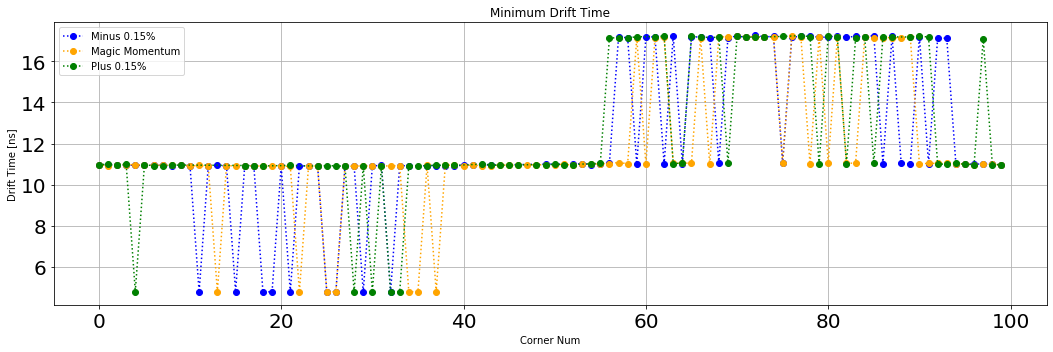

In [32]:
fig,ax = plt.subplots(figsize=(15,5))
colors = ['blue', 'orange', 'green', 'red']
for counter,name in enumerate(dfs):
    df = dfs[name]
    
    thetas = []
    meantimes = []
    stdtimes = []
    for theta in list(set(df['corner_num'])):
        dfi = df.loc[df['corner_num'] == theta]
        thetas.append(np.mean(dfi['corner_num']))
        meantimes.append(np.min(dfi['drifttime']))
        stdtimes.append(np.std(dfi['drifttime']))
    plt.errorbar(thetas, meantimes, 
                 #yerr=stdtimes,
                 fmt="o:", color=colors[counter], label=name)

plt.title("Minimum Drift Time")
plt.ylabel("Drift Time [ns]")
plt.xlabel("Corner Num")
    
plt.tight_layout()
#plt.yscale("log")
#plt.ylim(10,1000)
plt.grid()
plt.legend()
plt.show()
#    break

---

### Momentum loss

/home/jlab/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


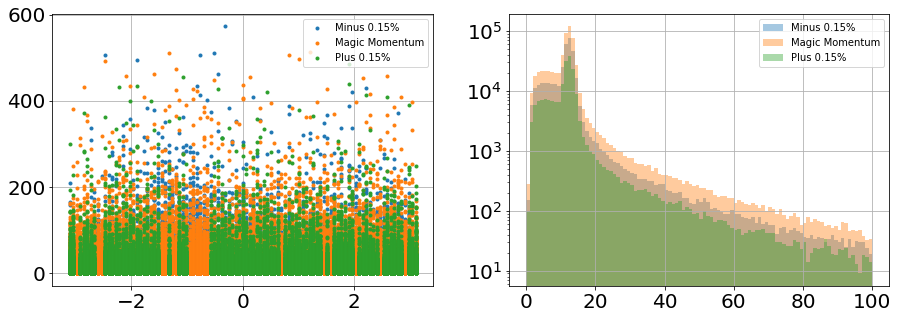

In [33]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

calo = 1
cyclotronperiod  = 149.9 #ns
for name in dfs:
    
    df = dfs[name]#.loc[dfs[name]['calo'] == calo]
    
    #plt.hist2d(df['calo']+1, df['drifttime'], bins=(26,100), range=((0,26), (0,150)), 
    #           norm=matplotlib.colors.LogNorm())y
    ax[0].plot(df['theta'], df['collimatorEnergyLoss'], ".", label=name)
    ax[1].hist(df['collimatorEnergyLoss'], alpha=0.4, label=name, bins=100, range=(0,100))
    ax[1].set_yscale("log")
    
for axi in ax:
    axi.legend()
    axi.grid()
plt.show()

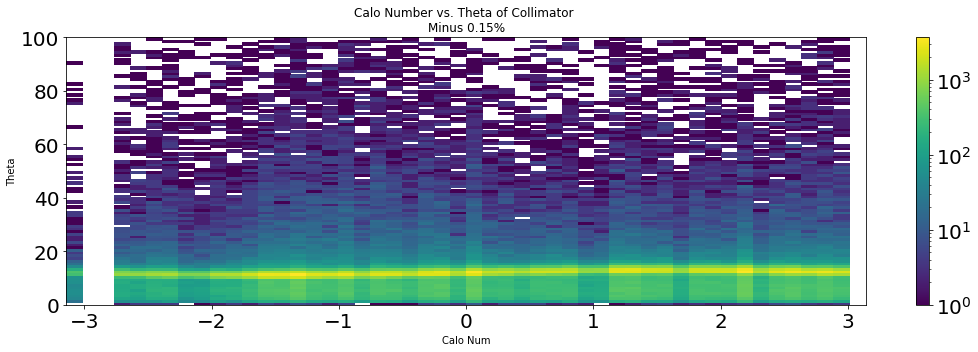

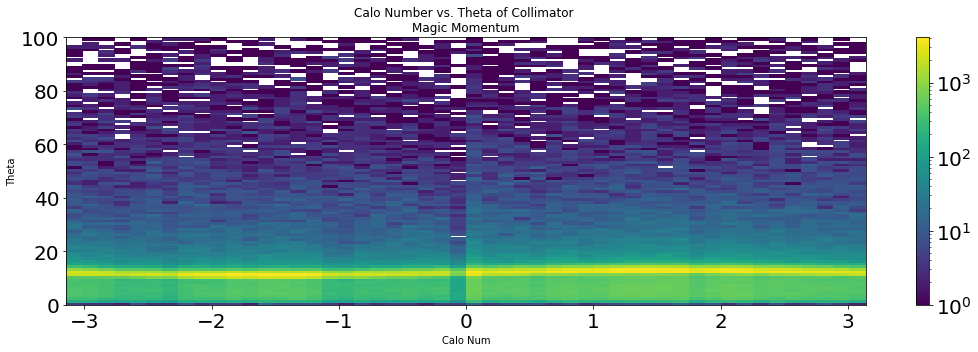

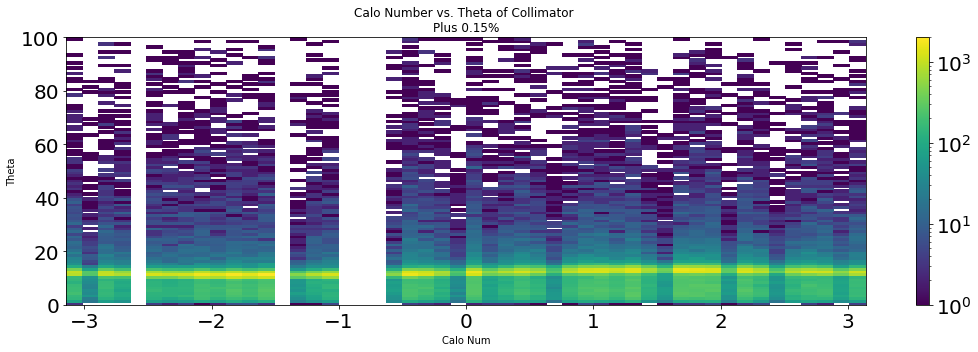

In [34]:
for name in dfs:
    df = dfs[name]
    fig,ax = plt.subplots(figsize=(15,5))
    
    plt.hist2d(df['theta'], df['collimatorEnergyLoss'], bins=(50,100), range=((-math.pi, math.pi),[0,100]),
              norm=matplotlib.colors.LogNorm())
    plt.title("Calo Number vs. Theta of Collimator \n"+name)
    plt.ylabel("Theta")
    plt.xlabel("Calo Num")
    
    #plt.yscale("log")
    plt.colorbar()
    plt.tight_layout()
    plt.show()

/home/jlab/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


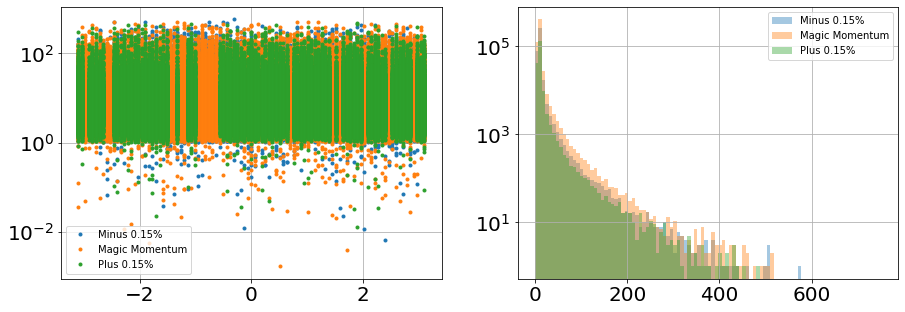

In [35]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

calo = 1
cyclotronperiod  = 149.9 #ns
for name in dfs:
    
    df = dfs[name]#.loc[dfs[name]['calo'] == calo]
    
    #plt.hist2d(df['calo']+1, df['drifttime'], bins=(26,100), range=((0,26), (0,150)), 
    #           norm=matplotlib.colors.LogNorm())y
    ax[0].plot(df['theta'], df['collimatorEnergyLoss'], ".", label=name)
    ax[0].set_yscale("log")

    ax[1].hist(df['collimatorEnergyLoss'], alpha=0.4, label=name, bins=100, range=(0,750))
    ax[1].set_yscale("log")
    
for axi in ax:
    axi.legend()
    axi.grid()
plt.show()

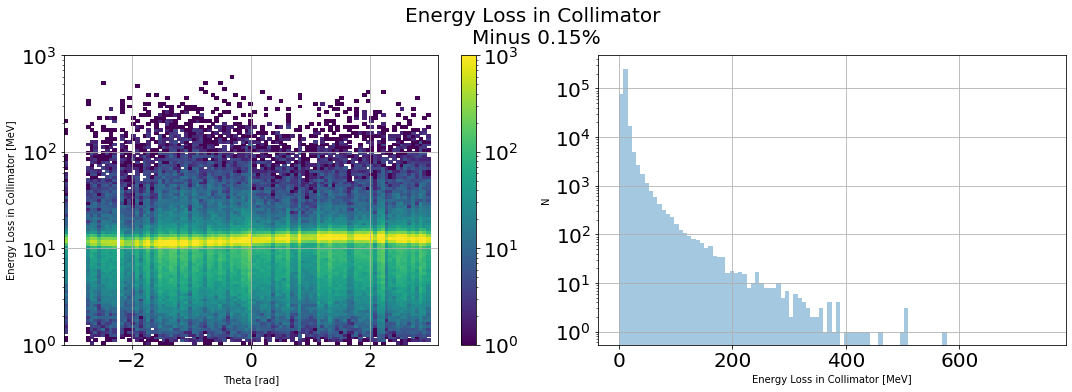

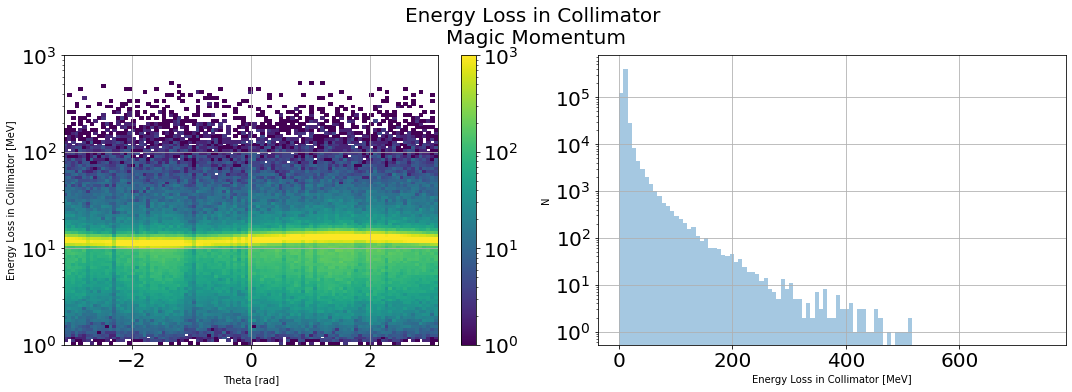

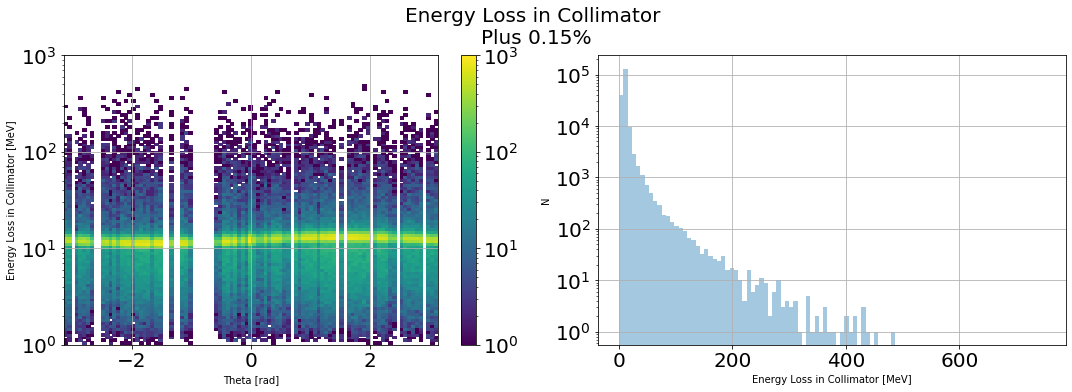

In [36]:
for name in dfs:
    fig,ax = plt.subplots(1,2,figsize=(15,5))

    calo = 1
    cyclotronperiod  = 149.9 #ns
    
    df = dfs[name]#.loc[dfs[name]['calo'] == calo]
    
    #plt.hist2d(df['calo']+1, df['drifttime'], bins=(26,100), range=((0,26), (0,150)), 
    #           norm=matplotlib.colors.LogNorm())y
    #ax[0].plot(df['theta'], df['collimatorEnergyLoss'], ".", label=name)
    ax[0].set_ylabel("Energy Loss in Collimator [MeV]")
    ax[0].set_xlabel("Theta [rad]")
    ding = ax[0].hist2d(df['theta'], df['collimatorEnergyLoss'], bins=[np.linspace(-math.pi,math.pi,100), np.logspace(0,3,100)],
                norm=matplotlib.colors.LogNorm(vmin=1,vmax=1000), label=name)
    plt.colorbar(mappable=ding[3], ax = ax[0])
    
    
    ax[1].hist(df['collimatorEnergyLoss'], alpha=0.4, label=name, bins=100, range=(0,750))
    ax[1].set_xlabel("Energy Loss in Collimator [MeV]")
    ax[1].set_ylabel("N")
    #ax[1].legend()

    for axi in ax:
        axi.set_yscale("log")
        axi.grid()
    plt.tight_layout()
    plt.suptitle("Energy Loss in Collimator \n"+name, y=1.08, fontsize=20)
    
    if(saveImages):
        plt.savefig("/home/jlab/Desktop/CollimatorEnergyLoss_"+str(name)+".png")
        plt.savefig("/home/jlab/Desktop/CollimatorEnergyLoss_"+str(name)+".pdf")
    
    plt.show()

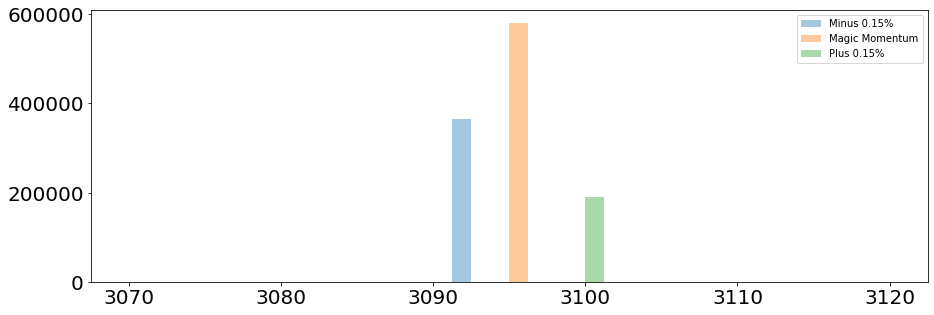

In [37]:
fig,ax = plt.subplots(figsize=(15,5))


for name in dfs:
    
    df = dfs[name]
    
    plt.hist(df['initialCollimatorEnergy'],label=name,bins=40,range=(3070,3120), alpha=.4)
    
plt.legend()
#plt.yscale("log")
#plt.xlim(3090,3095)
plt.show()